In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Merging 12 months data into single file

In [2]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files=[file for file in os.listdir('./Sales_Data')]
all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv('all_Data.csv',index=False)

## Read in updated dataframe

In [3]:
all_data=pd.read_csv('all_Data.csv')

In [4]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
186845,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
186846,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
186847,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
186848,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"


## Clean up data!!

### Drop rows of Nan

In [5]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data=all_data.dropna(how='all')

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [7]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

##### Convert columns to corect type

In [8]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])  #make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [9]:
all_data['Order ID']=all_data['Order ID'].astype('str')

## Augment Data with additional columns

### Add Month Column

In [10]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


## ADD a sales column

In [11]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


### ADD A city column

In [12]:
# lets use .apply()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City']=all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA)


# ANALYSIS

### Question 1: What was the best month for sales? How much was earned that month?

In [14]:
result=all_data.groupby('Month').sum()
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Month,,,,,,,,
1,1412341412351412361412371412381412391412401412...,iPhoneLightning Charging CableWired Headphones...,10903,1811768.38,01/22/19 21:2501/28/19 14:1501/17/19 13:3301/0...,"944 Walnut St, Boston, MA 02215185 Maple St, P...",1822256.73,Boston (MA) Portland (OR) San Francisco (CA) ...
2,1452121453721464421473091476631489871505021505...,Lightning Charging CableAAA Batteries (4-pack)...,13449,2188884.72,02/01/19 00:3602/01/19 04:0202/01/19 01:4802/0...,"484 6th St, Dallas, TX 75001459 West St, Dalla...",2202022.42,Dallas (TX) Dallas (TX) Los Angeles (CA) Dall...
3,1620091620091620091620101620111620121620131620...,iPhoneLightning Charging CableWired Headphones...,17005,2791207.83,03/28/19 20:5903/28/19 20:5903/28/19 20:5903/1...,"942 Church St, Austin, TX 73301942 Church St, ...",2807100.38,Austin (TX) Austin (TX) Austin (TX) San Franc...
4,1623581625411650071656221662501663091665671672...,Flatscreen TVAAA Batteries (4-pack)34in Ultraw...,20558,3367671.02,04/01/19 01:1104/01/19 01:1504/01/19 00:1204/0...,"444 12th St, New York City, NY 10001672 2nd St...",3390670.24,New York City (NY) Atlanta (GA) New York City...
5,1940951940961940971940981940991941001941011941...,Wired HeadphonesAA Batteries (4-pack)27in FHD ...,18667,3135125.13,05/16/19 17:1405/19/19 14:4305/24/19 11:3605/0...,"669 2nd St, New York City, NY 10001844 Walnut ...",3152606.75,New York City (NY) Dallas (TX) New York City ...
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",2577802.26,San Francisco (CA) Dallas (TX) San Francisco ...
7,2116652117902126042136602136992140992140992149...,27in FHD MonitorAAA Batteries (4-pack)27in FHD...,16072,2632539.56,07/01/19 00:5407/01/19 02:0507/01/19 00:5007/0...,"300 9th St, San Francisco, CA 94016791 13th St...",2647775.76,San Francisco (CA) New York City (NY) San Fra...
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle (WA) Dallas (TX) Portland (OR) Los An...
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13,San Francisco (CA) San Francisco (CA) Seattle...


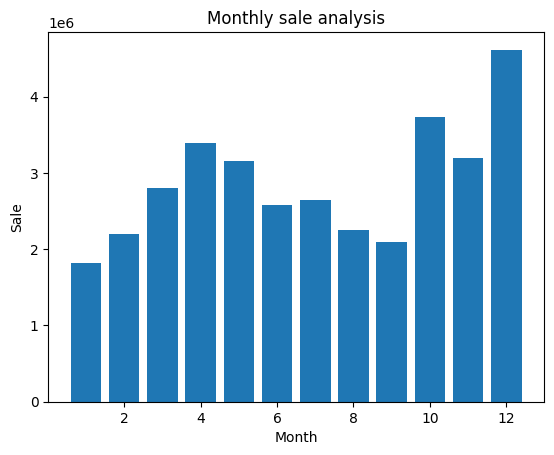

In [15]:
month=np.arange(1,13)
monthlysale=np.array(result['Sales'])
plt.bar(month,monthlysale)
plt.xlabel('Month')
plt.ylabel('Sale')
plt.title('Monthly sale analysis')
plt.show()


#### This graph shows that Sales are highest in December, likely due to both Black Friday deals and people buying gifts for Christmas.

### Question 2: Which city had the highest number of sale ??

In [16]:
result2=all_data.groupby('City').sum()
result2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),2788222788672788772788872789042789272789522789...,Bose SoundSport HeadphonesApple Airpods Headph...,16602,2779908.20,11/20/19 08:1711/13/19 11:5511/24/19 20:0811/1...,"816 Park St, Atlanta, GA 30301249 Madison St, ...",104794,2795498.58
Austin (TX),2787982788042788072788262788482788742788852789...,USB-C Charging CableBose SoundSport Headphones...,11153,1809873.61,11/17/19 10:0311/15/19 11:4811/25/19 21:5211/2...,"962 Hickory St, Austin, TX 73301866 Sunset St,...",69829,1819581.75
Boston (MA),2788012788062788062788082788102788132788142788...,Bose SoundSport HeadphonesBose SoundSport Head...,22528,3637409.77,11/09/19 13:5611/19/19 19:1211/19/19 19:1211/2...,"522 Hill St, Boston, MA 02215174 2nd St, Bosto...",141112,3661642.01
Dallas (TX),2788092788212788592788692788712788922788942789...,AA Batteries (4-pack)USB-C Charging Cable27in ...,16730,2752627.82,11/17/19 12:3811/25/19 16:1711/21/19 22:2911/2...,"969 13th St, Dallas, TX 75001327 13th St, Dall...",104620,2767975.40
Los Angeles (CA),2787992788292788312788342788402788402788442788...,Apple Airpods HeadphonesiPhoneBose SoundSport ...,33289,5421435.23,11/19/19 14:5611/20/19 22:1911/11/19 12:3711/0...,"464 Cherry St, Los Angeles, CA 90001977 Johnso...",208325,5452570.80


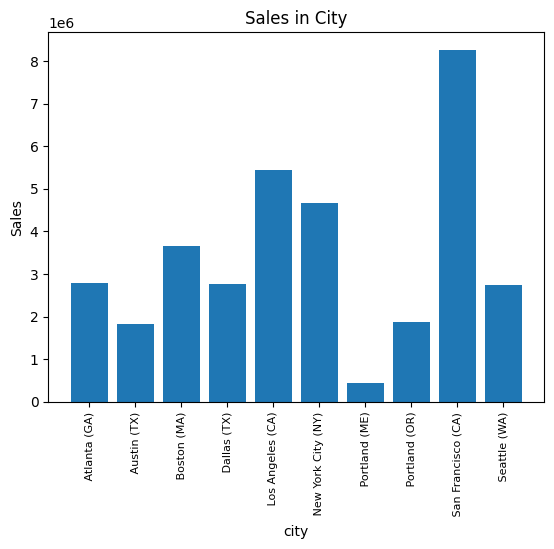

In [17]:
plt.title('Sales in City')

cities=[city for city,df in all_data.groupby('City')]
plt.bar(cities,result2['Sales'])

plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('city')
plt.ylabel('Sales')


plt.show()

#### Sales are highest in San Francisco, possibly influenced by the presence of Silicon Valley, as our data specifically focuses on electronics sales.

### QUESTION 3 :What time should we display advertisements to maximize likelihood of customers buying Product

In [18]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

/tmp/ipykernel_2837/2539822065.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']=pd.to_datetime(all_data['Order Date'])


In [19]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56


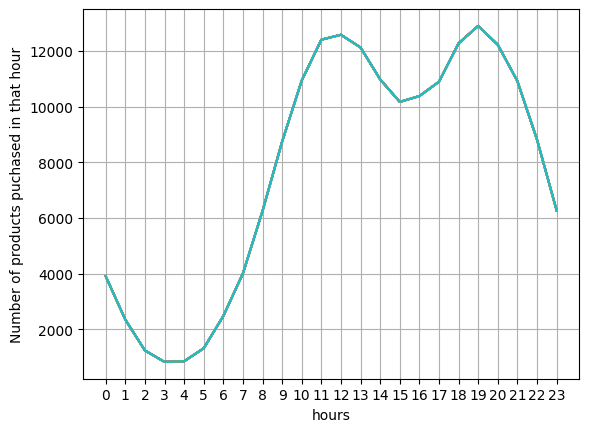

In [20]:
hours=[hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('hours')
plt.ylabel('Number of products puchased in that hour')
plt.show()

#### Maximum products are sold during 11am, 12 noon and 7pm which is valid as these are usually the peek working hours. Therefore, advertising during these times would be most effective

### QUESTION 4:Maximum selling product

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56


In [22]:
quantity_total=all_data.groupby('Product')['Quantity Ordered'].sum()
quantity_total

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

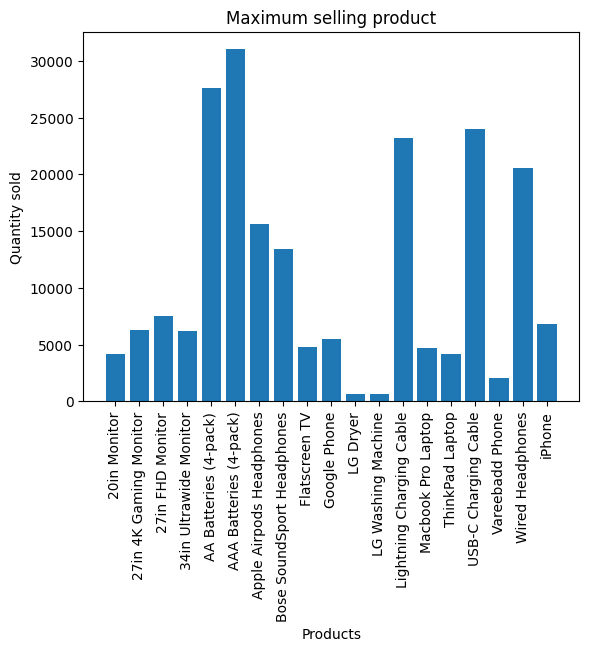

In [23]:
products=[product for product,df in all_data.groupby('Product')]


plt.bar(products,quantity_total)
plt.xticks(products,rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity sold')
plt.title('Maximum selling product')
plt.show()

#### AAA Batteries(4-pack) is the product that is sold in large quantities throughout the year. Batteries get worn out more quickly than other products and needs to be replaced.And futher they are used in many electronics devices. So people purchase them more frequently.  

### QUESTION 5: Maximum revenue earning product

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56


In [25]:
maxrev = all_data.groupby('Product')['Sales'].sum()
maxrev

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64

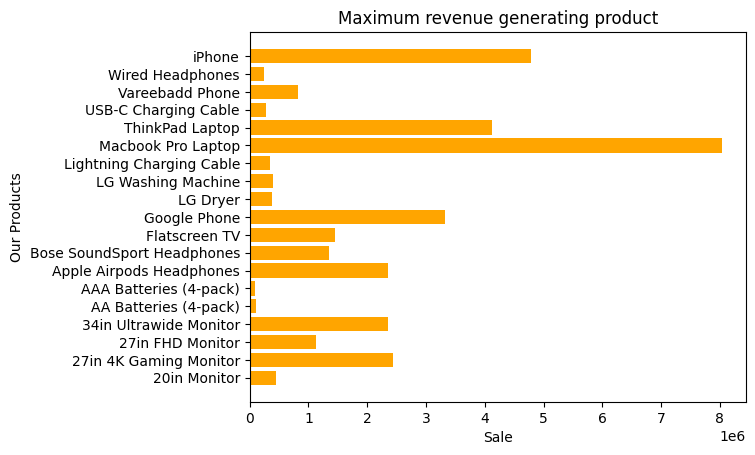

In [26]:
products=[product for product,df in all_data.groupby('Product')]

plt.barh(products,maxrev,color="orange")
plt.title('Maximum revenue generating product')
plt.xlabel('Sale')
plt.ylabel('Our Products')
plt.show()

#### MacBooks are typically expensive but serve as a lucrative source of revenue. While they may not be purchased frequently, each sale generates substantial revenue compared to batteries.

### Question 6:Product Costs

In [27]:
uniqueProd=all_data.drop_duplicates(subset='Product',keep="first")

In [28]:
all_data.to_csv('filterd.csv')

In [29]:
uniqueProd

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56
6,278803,Lightning Charging Cable,1,14.95,2019-11-11 08:05:00,"724 5th St, San Francisco, CA 94016",11,14.95,San Francisco (CA),8,5
10,278806,ThinkPad Laptop,1,999.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,999.99,Boston (MA),19,12
12,278808,AAA Batteries (4-pack),1,2.99,2019-11-23 13:19:00,"155 Highland St, Boston, MA 02215",11,2.99,Boston (MA),13,19
13,278809,AA Batteries (4-pack),1,3.84,2019-11-17 12:38:00,"969 13th St, Dallas, TX 75001",11,3.84,Dallas (TX),12,38
18,278813,Macbook Pro Laptop,1,1700.00,2019-11-09 22:40:00,"131 6th St, Boston, MA 02215",11,1700.00,Boston (MA),22,40


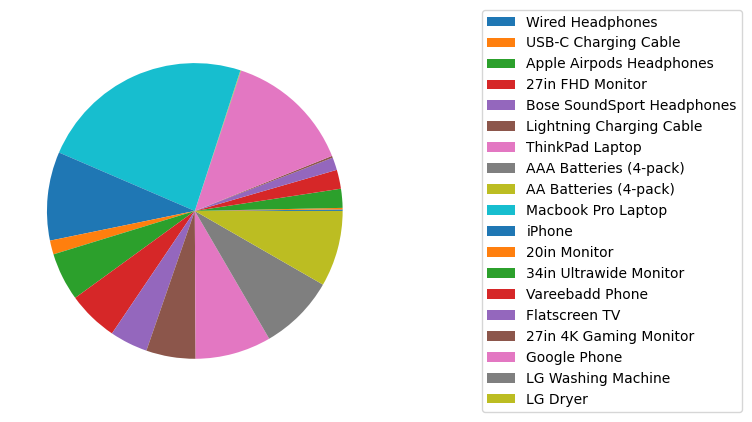

In [30]:
plt.pie(uniqueProd['Price Each'])
plt.legend(uniqueProd['Product'],loc="right",bbox_to_anchor=(2, 0.5))
plt.show()

#### The MacBook stands out as the most expensive product, while batteries are priced at the lower end of the spectrum.